## Predicting with Machine Learning

In [1]:
# Load the data
data(iris)

In [2]:
# Set a seed to make randomness reproducable
set.seed(42)

In [3]:
# Randomly sample 100 of 150 row indexes
indexes <- sample(x=1:150, size=100)

In [4]:
#Inspect the random indexes
print(indexes)

  [1] 138 140  43 123  94  76 107  20 146 100  65 141 129  35  63 127 132  16
 [19] 136  74 118  18 135 121  11 149  49 112  55 102  89  97  46  81   1  96
 [37] 116  24 128  68  42  48   5 105 130 101  93  66 139 134  34 137  40  77
 [55]   4  72  64 133  25  47  61  88  67  50 131  17  23  69  57 143 115  12
 [73]  85  37 104  54 114  28  38  86  41 126  92  44  52 119  15   6 144  19
 [91]  70  71  13  75 103  60 150  73  39  32


In [5]:
# Creating a training set from indexes
train <- iris[indexes,]

In [6]:
# Creating a test set from remaining indexes
test <- iris[-indexes,]

In [7]:
# Load the decision tree package
# install.packages("tree") # if tree package is not installed
library(tree)

In [8]:
# Train a decision tree model
model <- tree(formula = Species ~ ., data = train)

In [9]:
# Inspect the model
summary(model)


Classification tree:
tree(formula = Species ~ ., data = train)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width" 
Number of terminal nodes:  4 
Residual mean deviance:  0.05213 = 5.004 / 96 
Misclassification error rate: 0.01 = 1 / 100 

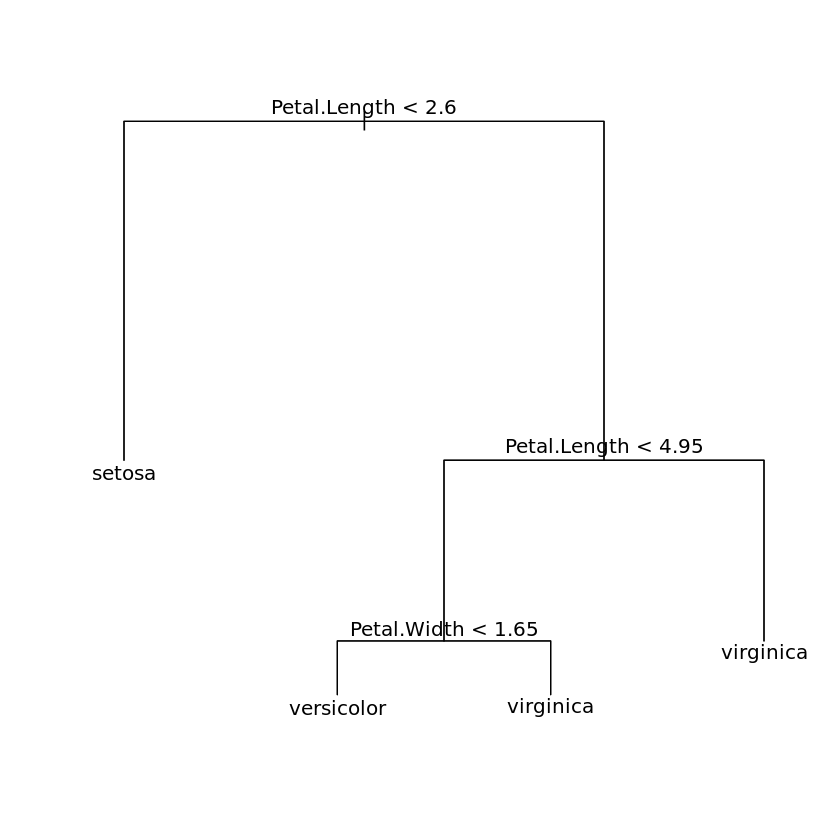

In [10]:
# Visualize the decision tree model
plot(model)
text(model)

In [11]:
# Load color brewer library
library(RColorBrewer)

In [12]:
# Create a color palette
palette <- brewer.pal(3, "Set2")

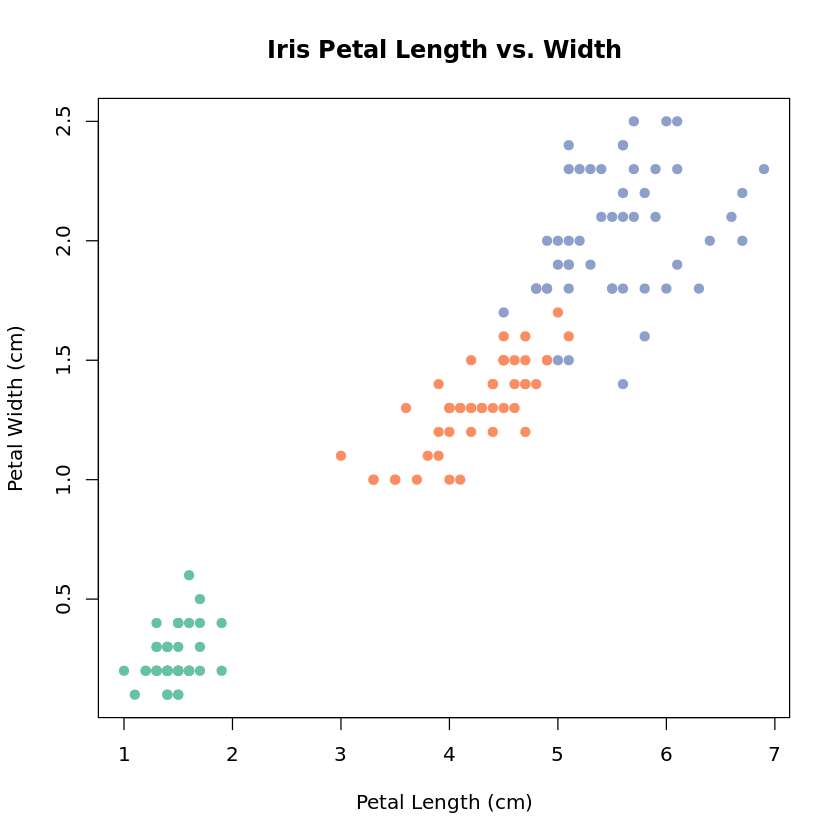

In [13]:
# Create a scatterplot colored by species
plot(
    x = iris$Petal.Length, 
    y = iris$Petal.Width,
    pch = 19,
    col = palette[as.numeric(iris$Species)],
    main = "Iris Petal Length vs. Width",
    xlab = "Petal Length (cm)",
    ylab = "Petal Width (cm)")

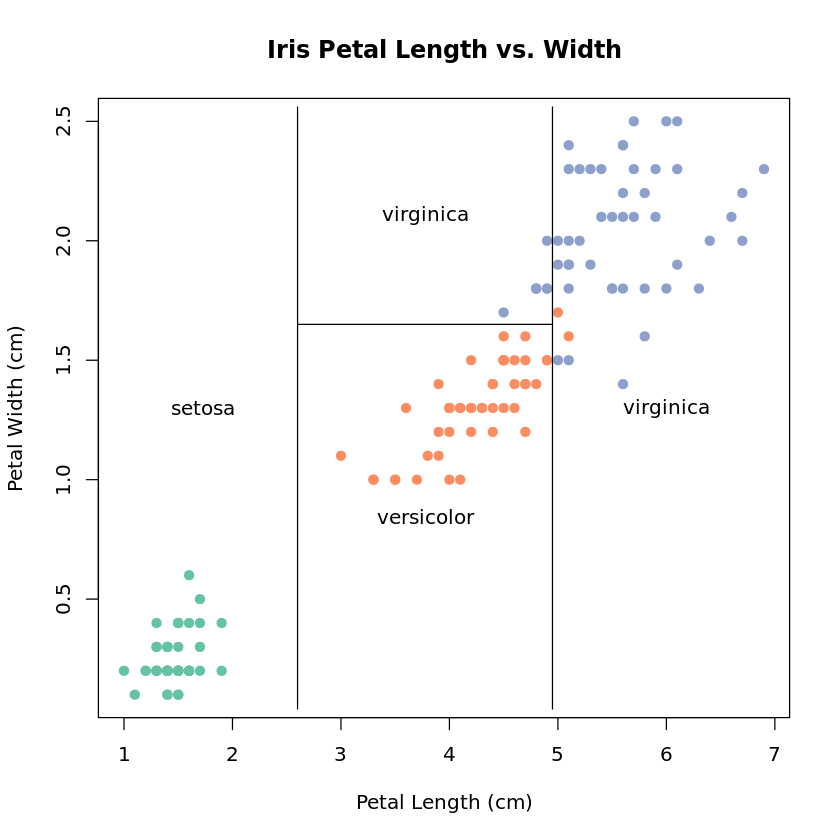

In [14]:
# Plot the decision boundaries
plot(
    x = iris$Petal.Length, 
    y = iris$Petal.Width,
    pch = 19,
    col = palette[as.numeric(iris$Species)],
    main = "Iris Petal Length vs. Width",
    xlab = "Petal Length (cm)",
    ylab = "Petal Width (cm)")
partition.tree(
    tree = model,
    label = "Species",
    add = TRUE)

In [15]:
# Predict with the model
predictions <- predict(
    object = model,
    newdata = test,
    type = "class")

In [16]:
# Create a confusion matrix
table(
    x = predictions, 
    y = test$Species)

            y
x            setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         16         0
  virginica       0          2        15

In [17]:
# Load the caret package
# install.packages("e1071")
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [18]:
# Evaluate the prediction results
confusionMatrix(
    data = predictions, 
    reference = test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         16         0
  virginica       0          2        15

Overall Statistics
                                          
               Accuracy : 0.96            
                 95% CI : (0.8629, 0.9951)
    No Information Rate : 0.36            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.94            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.8889           1.0000
Specificity                   1.00            1.0000           0.9429
Pos Pred Value                1.00            1.0000           0.8824
Neg Pred Value                1.00            0.9412           1.0000
Prevalence                    0.34          

In [19]:
# Set working directory
setwd("C:/Pluralsight")

In [20]:
# Save the tree model
save(model, file = "Tree.RData")

In [21]:
# Save the training data
save(train, file = "Train.RData")